In [13]:
import sinter 
import matplotlib.pyplot as plt
import numpy as np
import os
from phenomenological_noise_experiments.threshold_plot import *
from sinter._csv_out import CSV_HEADER

## Import and compress data

In [14]:

def merge_folder_data_into_new_file(folder_name, data_file):
    os.system(f"cp {data_file}.csv {data_file}_backup.csv")
    for file in os.listdir(folder_name):
        if file.endswith(".csv"):
            os.system(f"sinter combine {folder_name}/{file} {data_file}.csv > {data_file}_new.csv")
            os.system(f"cp {data_file}_new.csv {data_file}.csv")
            os.system(f"rm {data_file}_new.csv")

merge_folder_data_into_new_file("resume_24_8", "data_24_8/combined_data")
biases = []
samples = sinter.stats_from_csv_files('data_24_8/combined_data.csv')
for sample in samples:
    if sample.json_metadata['bias'] not in biases:
        if sample.json_metadata['bias'] != 10000:
            
            biases.append(sample.json_metadata['bias'])
biases.sort()
all_thresholds_hcc = dict()
all_thresholds_fcc = dict()
all_thresholds_hcc['pymatching'] = dict()
all_thresholds_hcc['beliefmatching'] = dict()
all_thresholds_fcc['pymatching'] = dict()
all_thresholds_fcc['beliefmatching'] = dict()

### Function for generating plots

In [15]:
def plot_threshold(ax, stats, filter_func, min_per, max_per, min_dis):  # , filter_func, x_func):
    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func=lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func=filter_func,
        x_func=lambda stat: stat.json_metadata['p'])
    ax.set_xlim(min_per, max_per)
    ax.set_yscale('log')
    thresholds, err = get_one_threshold(stats, filter_func, 1, min_per, max_per, min_dis)
    ax.axvline(x=thresholds, color="black", linestyle="dashed")
    ax.axvspan(
        thresholds-err, thresholds+err, alpha=0.5, color='pink'
    )
    return thresholds, err


## Depolarizing vs measurement noise with gauge fixing

### Gauge Floquet Color Code

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 50000.

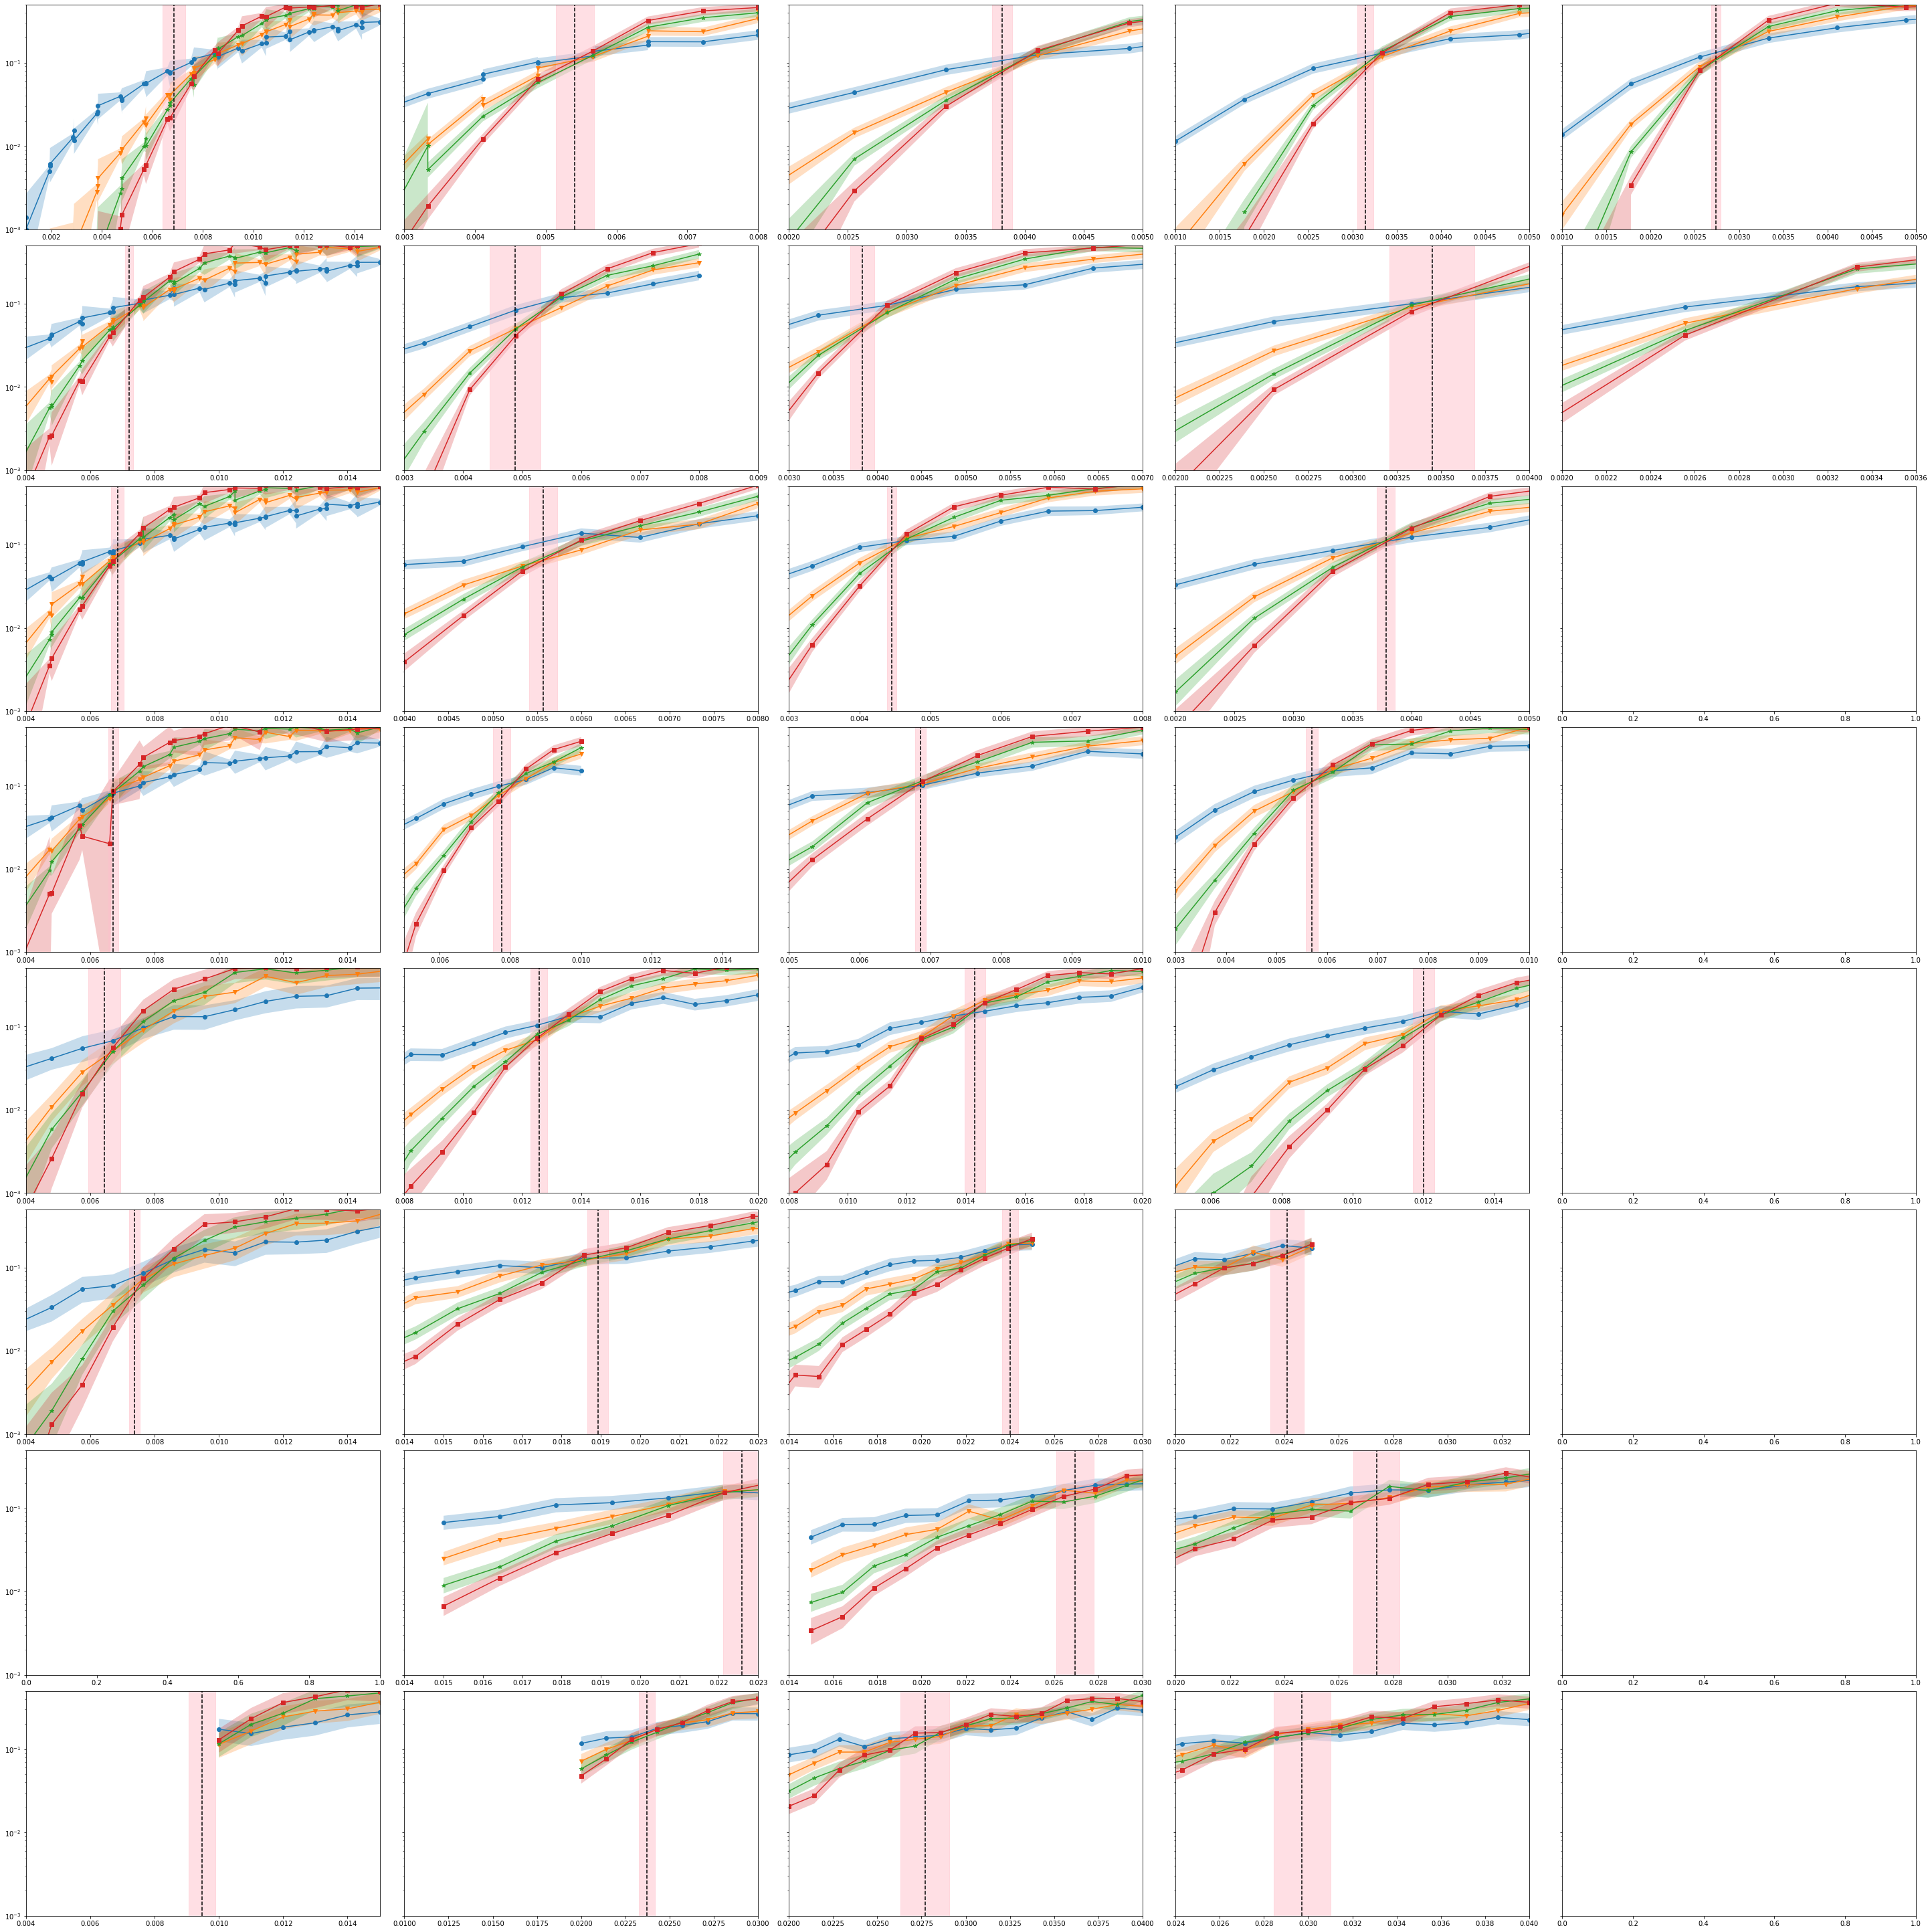

In [16]:
fig, axis = plt.subplots(8, 5, figsize=(40, 40), sharey=True, constrained_layout=True)
axis[0][0].set_ylim(0.001, 0.5)
thresholds_vs_gauge_factor_fcc_bm = dict()
gauge_factors = ['Gauge1', 'Gauge2', 'Gauge3', 'Gauge4', 'Gauge5']
for gauge_factor in gauge_factors:
    thresholds_vs_gauge_factor_fcc_bm[gauge_factor] = dict()

x_bounds = dict()
x_bounds['Gauge1'] = {0: (0.001, 0.015), 0.25: (0.004, 0.015), 0.5: (0.004, 0.015), 2: (
    0.004, 0.015), 8: (0.004, 0.015), 32: (0.004, 0.015), 128: (0.004, 0.015), 9999: (0.004, 0.015)}
x_bounds['Gauge2'] = {0: (0.003, 0.008), 0.25: (0.003, 0.009), 0.5: (0.004, 0.008), 2: (
    0.005, 0.015), 8: (0.008, 0.02), 32: (0.014, 0.023), 128: (0.014, 0.023), 9999: (0.01, 0.03)}
x_bounds['Gauge3'] = {0: (0.002, 0.005), 0.25: (0.003, 0.007), 0.5: (0.003, 0.008), 2: (
    0.005, 0.01), 8: (0.008, 0.02), 32: (0.014, 0.03), 128: (0.014, 0.03), 9999: (0.02, 0.04)}
x_bounds['Gauge4'] = {0: (0.001, 0.005), 0.25: (0.002, 0.004), 0.5: (0.002, 0.005), 2: (
    0.003, 0.01), 8: (0.005, 0.015), 32: (0.02, 0.033), 128: (0.02, 0.033), 9999: (0.024, 0.04)}
x_bounds['Gauge5'] = {0: (0.001, 0.005), 0.25: (0.002, 0.0036), 0.5: (0.002, 0.005), 2: (
    0.003, 0.008), 8: (0.002, 0.015), 32: (0.014, 0.04), 128: (0.014, 0.04), 9999: (0.024, 0.04)}

for gauge_index, gauge_factor in enumerate(gauge_factors[:5]):
    for bias_index, bias in enumerate(biases):
        if gauge_factor == 'Gauge1':
            if bias != 128:
                def filter_func(s): return s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata[
                    'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
                thresholds_vs_gauge_factor_fcc_bm[gauge_factor][bias] = plot_threshold(
                    axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)
        else:
            def filter_func(s): return s.decoder == 'beliefmatching' and s.json_metadata['code'] == gauge_factor + \
                'FloquetColourCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
            thresholds_vs_gauge_factor_fcc_bm[gauge_factor][bias] = plot_threshold(
                axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)


0
0.25
0.5
2
8
32
9999
0
0.25
0.5
2
8
32
9999
0


ValueError: `ydata` must not be empty!

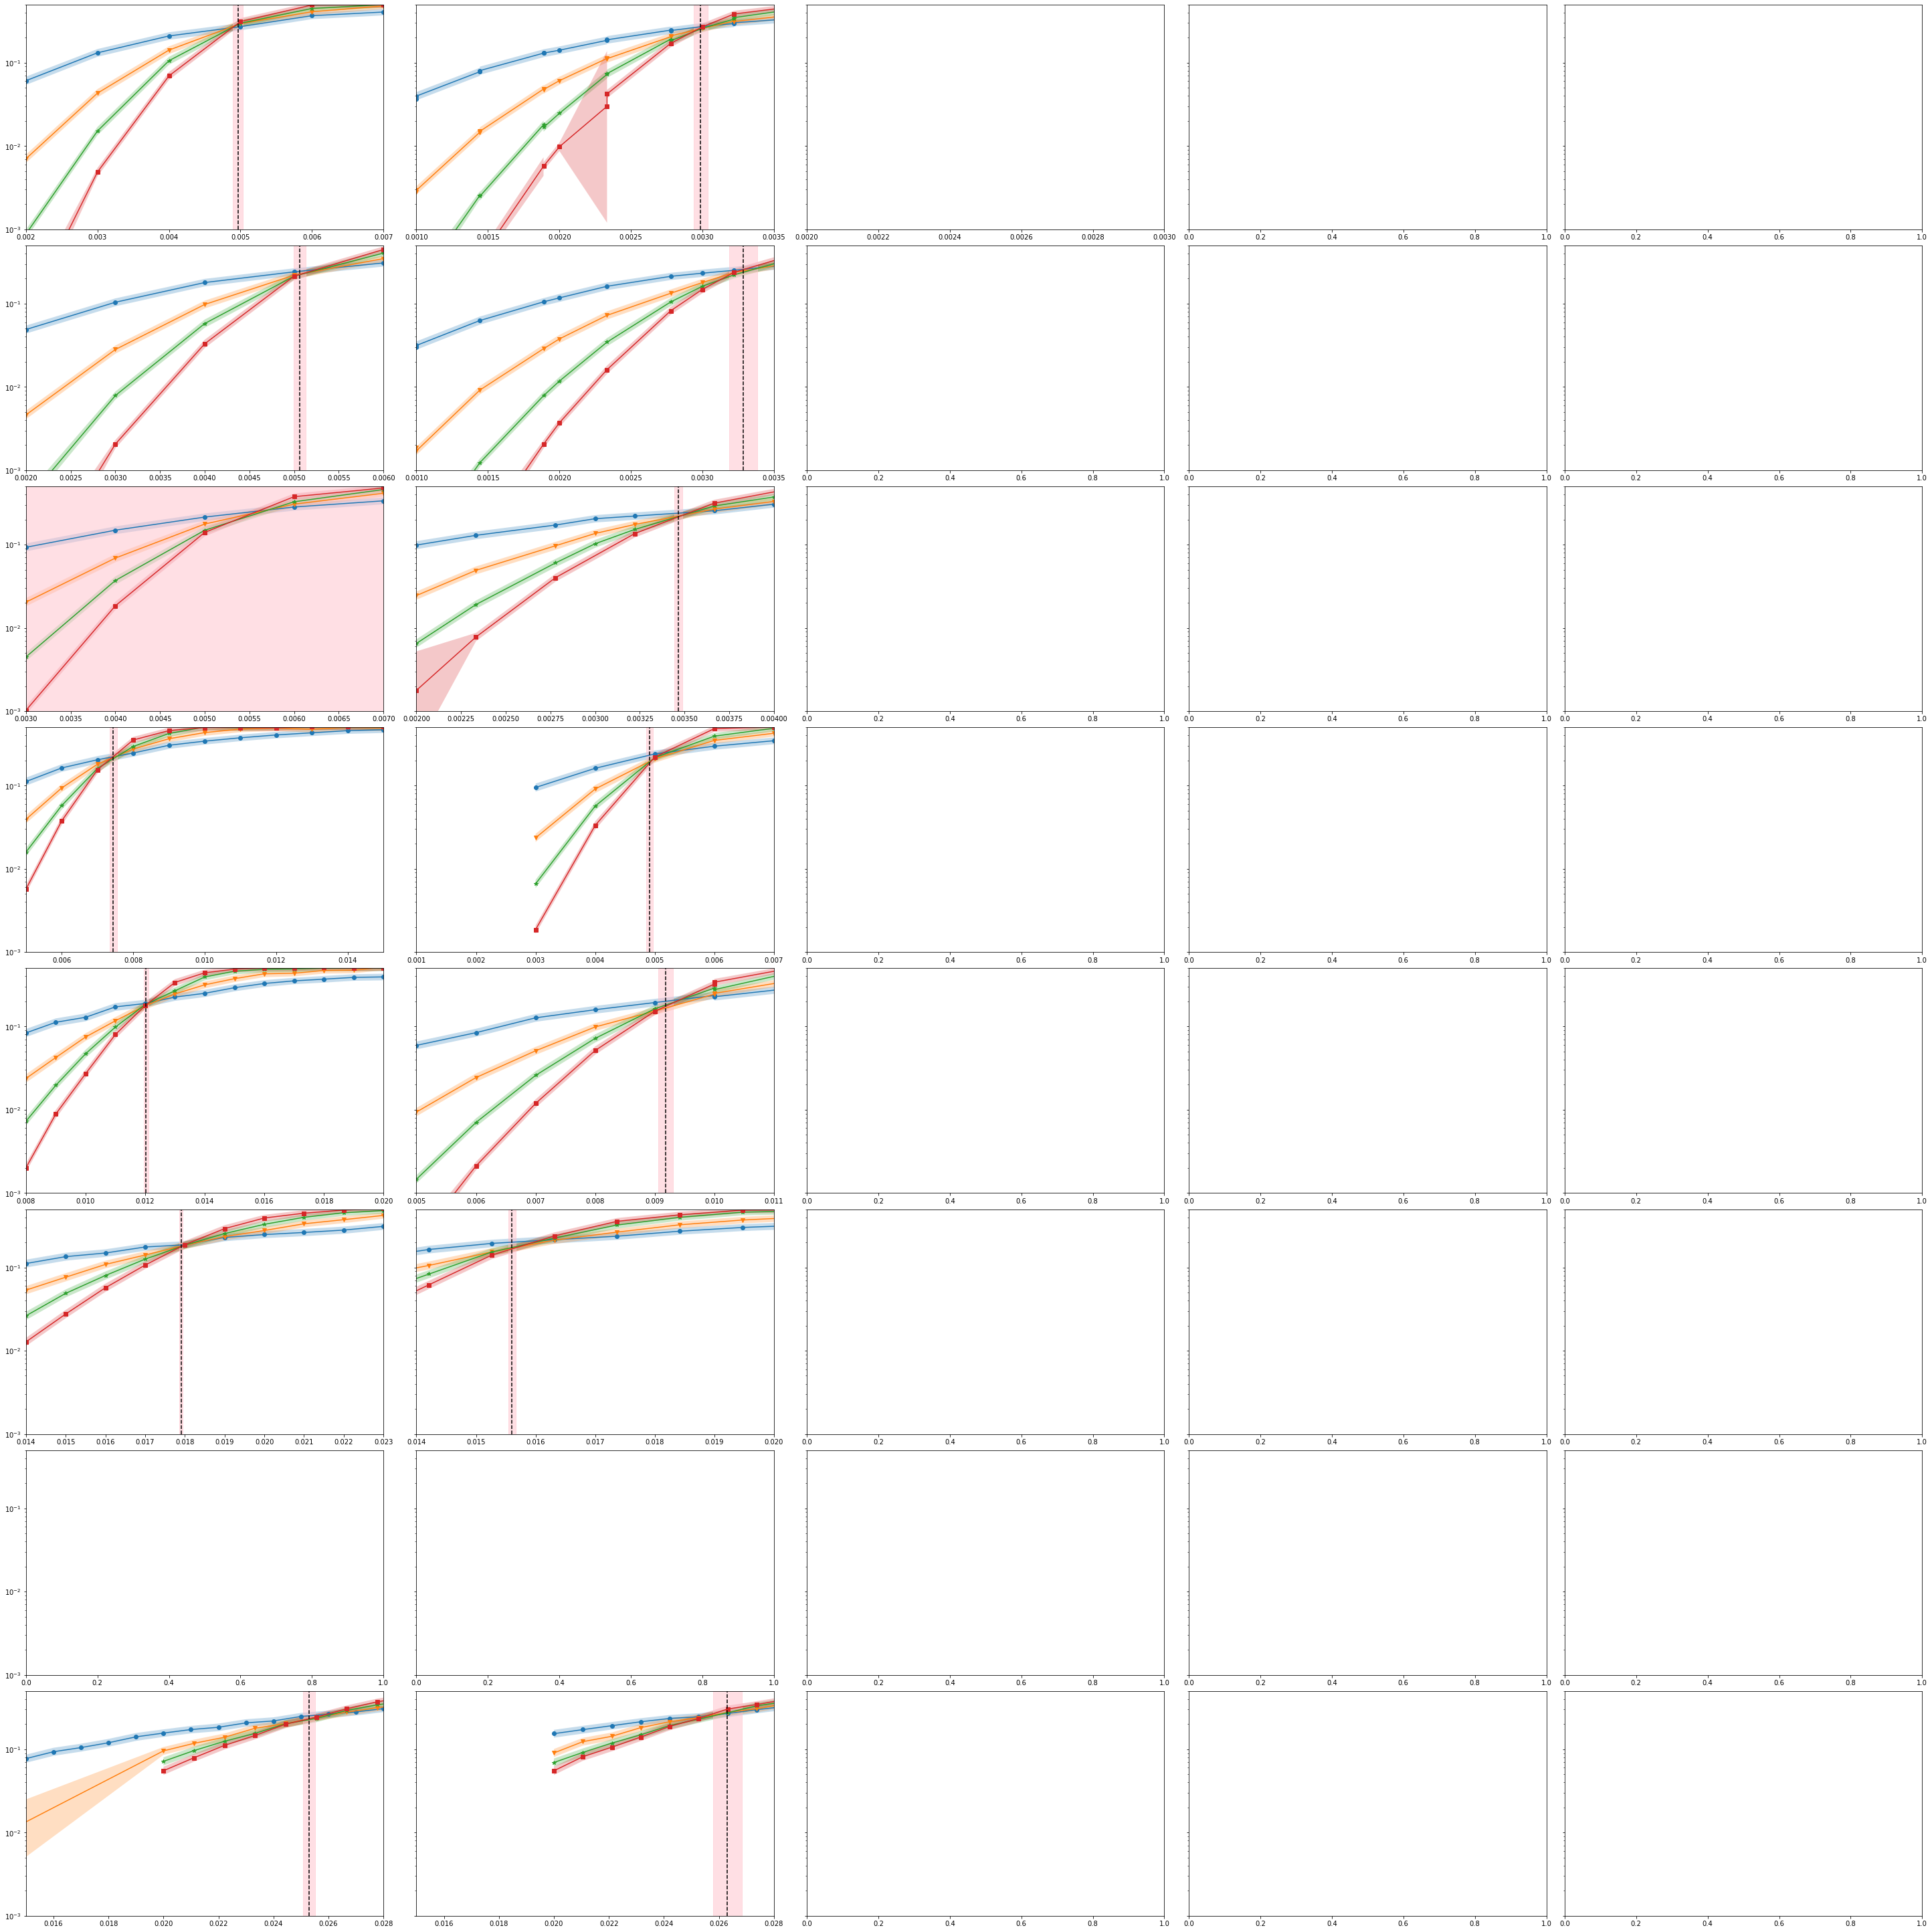

In [37]:
fig, axis = plt.subplots(8, 5, figsize=(40, 40), sharey=True, constrained_layout=True)
axis[0][0].set_ylim(0.001, 0.5)
thresholds_vs_gauge_factor_fcc_bm = dict()
gauge_factors = ['Gauge1', 'Gauge2', 'Gauge3', 'Gauge4', 'Gauge5']
for gauge_factor in gauge_factors:
    thresholds_vs_gauge_factor_fcc_bm[gauge_factor] = dict()

x_bounds = dict()
x_bounds['Gauge1'] = {0: (0.001, 0.015), 0.25: (0.004, 0.015), 0.5: (0.004, 0.015), 2: (
    0.004, 0.015), 8: (0.004, 0.015), 32: (0.004, 0.015), 128: (0.004, 0.015), 9999: (0.004, 0.01)}
x_bounds['Gauge2'] = {0: (0.002, 0.007), 0.25: (0.002, 0.006), 0.5: (0.003, 0.007), 2: (
    0.005, 0.015), 8: (0.008, 0.02), 32: (0.014, 0.023), 128: (0.014, 0.023), 9999: (0.015, 0.028)}
x_bounds['Gauge3'] = {0: (0.001, 0.0035), 0.25: (0.001, 0.0035),0.5: (0.002, 0.004), 2: (
    0.001, 0.007), 8: (0.005, 0.011), 32: (0.014, 0.02), 128: (0.014, 0.03), 9999: (0.015, 0.028)}
x_bounds['Gauge4'] = {0: (0.002, 0.003), 0.25: (0.002, 0.004), 0.5: (0.002, 0.004), 2: (
    0.003, 0.01), 8: (0.005, 0.015), 32: (0.02, 0.033), 128: (0.02, 0.033), 9999: (0.024, 0.04)}
x_bounds['Gauge5'] = {0: (0.002, 0.005), 0.25: (0.002, 0.005), 0.5: (0.002, 0.005), 2: (
    0.003, 0.005), 8: (0.002, 0.015), 32: (0.014, 0.04), 128: (0.014, 0.04), 9999: (0.024, 0.04)}

for gauge_index, gauge_factor in enumerate(gauge_factors[1:]):
    for bias_index, bias in enumerate(biases):
        if gauge_factor == 'Gauge1':
            if bias != 128:
                def filter_func(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata[
                    'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
                thresholds_vs_gauge_factor_fcc_bm[gauge_factor][bias] = plot_threshold(
                    axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)
        else:
            if bias != 128:
                print(bias)
                def filter_func(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == gauge_factor + \
                    'FloquetColourCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
                thresholds_vs_gauge_factor_fcc_bm[gauge_factor][bias] = plot_threshold(
                    axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


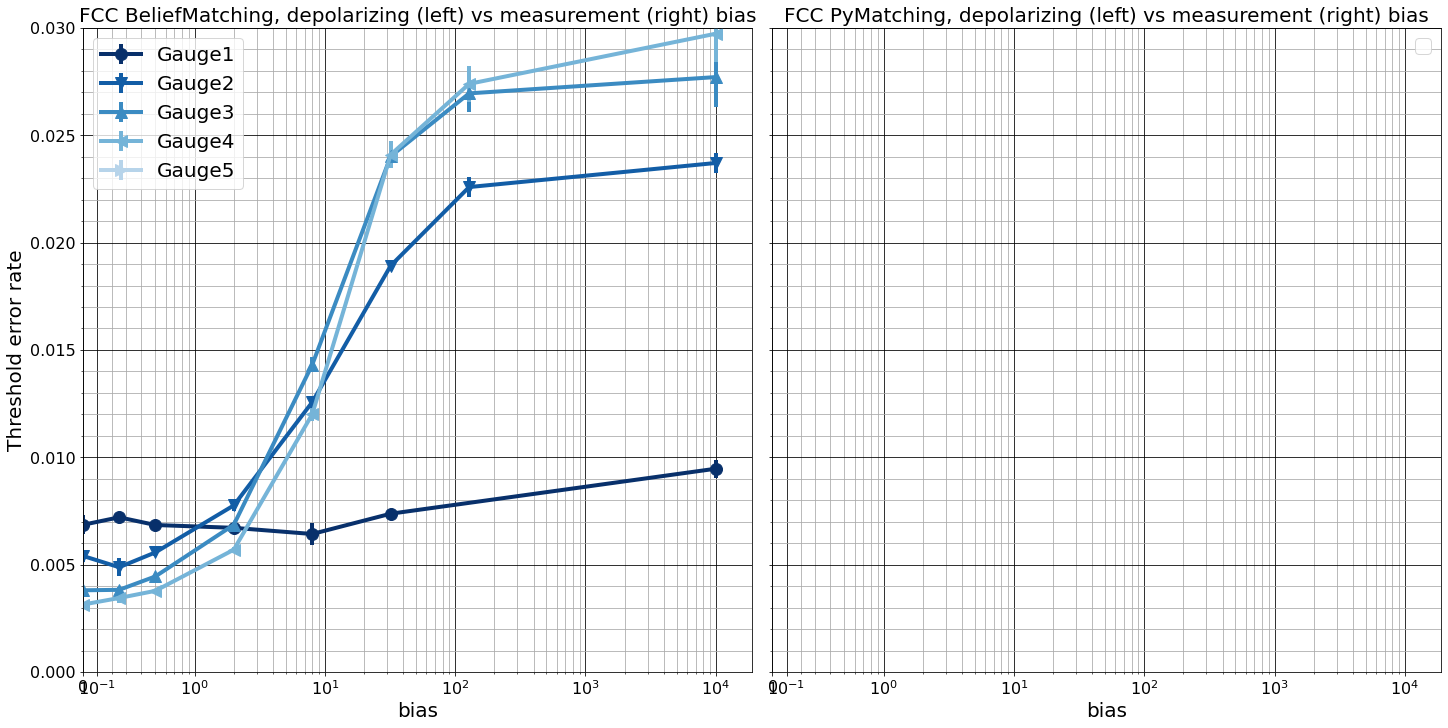

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,10), sharey=True, constrained_layout=True)
def plot_gauge_thresholds(thresholds, ax, line_style,label,color, marker):
    y_val = [thresholds[bias][0] for bias in biases if bias in thresholds.keys()]
    y_err = [thresholds[bias][1] for bias in biases if bias in thresholds.keys()]
    ax.errorbar([bias for bias in biases if bias in thresholds.keys()], y_val, yerr=y_err, label=label, marker=marker,markersize=12, linewidth=4, linestyle=line_style, color=color)
b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]
g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]
# get list of markers implemented in matplotlib
markers = [m for m in plt.Line2D.markers.keys() if m not in ['None', ' ', '']]

for index, gauge in enumerate(['Gauge1', 'Gauge2', 'Gauge3', 'Gauge4', 'Gauge5']):
    plot_gauge_thresholds(thresholds_vs_gauge_factor_fcc_bm[gauge], ax[0], 'solid', gauge, b_colors[index], markers[index+2])
#    plot_gauge_thresholds(thresholds_vs_gauge_factor_fcc_pm[gauge], ax[1], 'solid', gauge, g_colors[index], markers[index+2])

for a in ax:
    a.set_xscale('symlog', linthresh = 0.5, subs = range(2, 10), linscale = 0.5)
    a.set_xlabel('bias', size=20)
    a.set_xlim(0,19000)
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)
    
ax[0].set_ylim(0,0.03)
ax[0].set_ylabel('Threshold error rate', size=20)
ax[0].set_title('FCC BeliefMatching, depolarizing (left) vs measurement (right) bias', size=20)
ax[1].set_title('FCC PyMatching, depolarizing (left) vs measurement (right) bias', size=20)
ax[0].legend(prop={'size': 20})
ax[1].legend(prop={'size': 20})

### Gauge Honeycomb Code

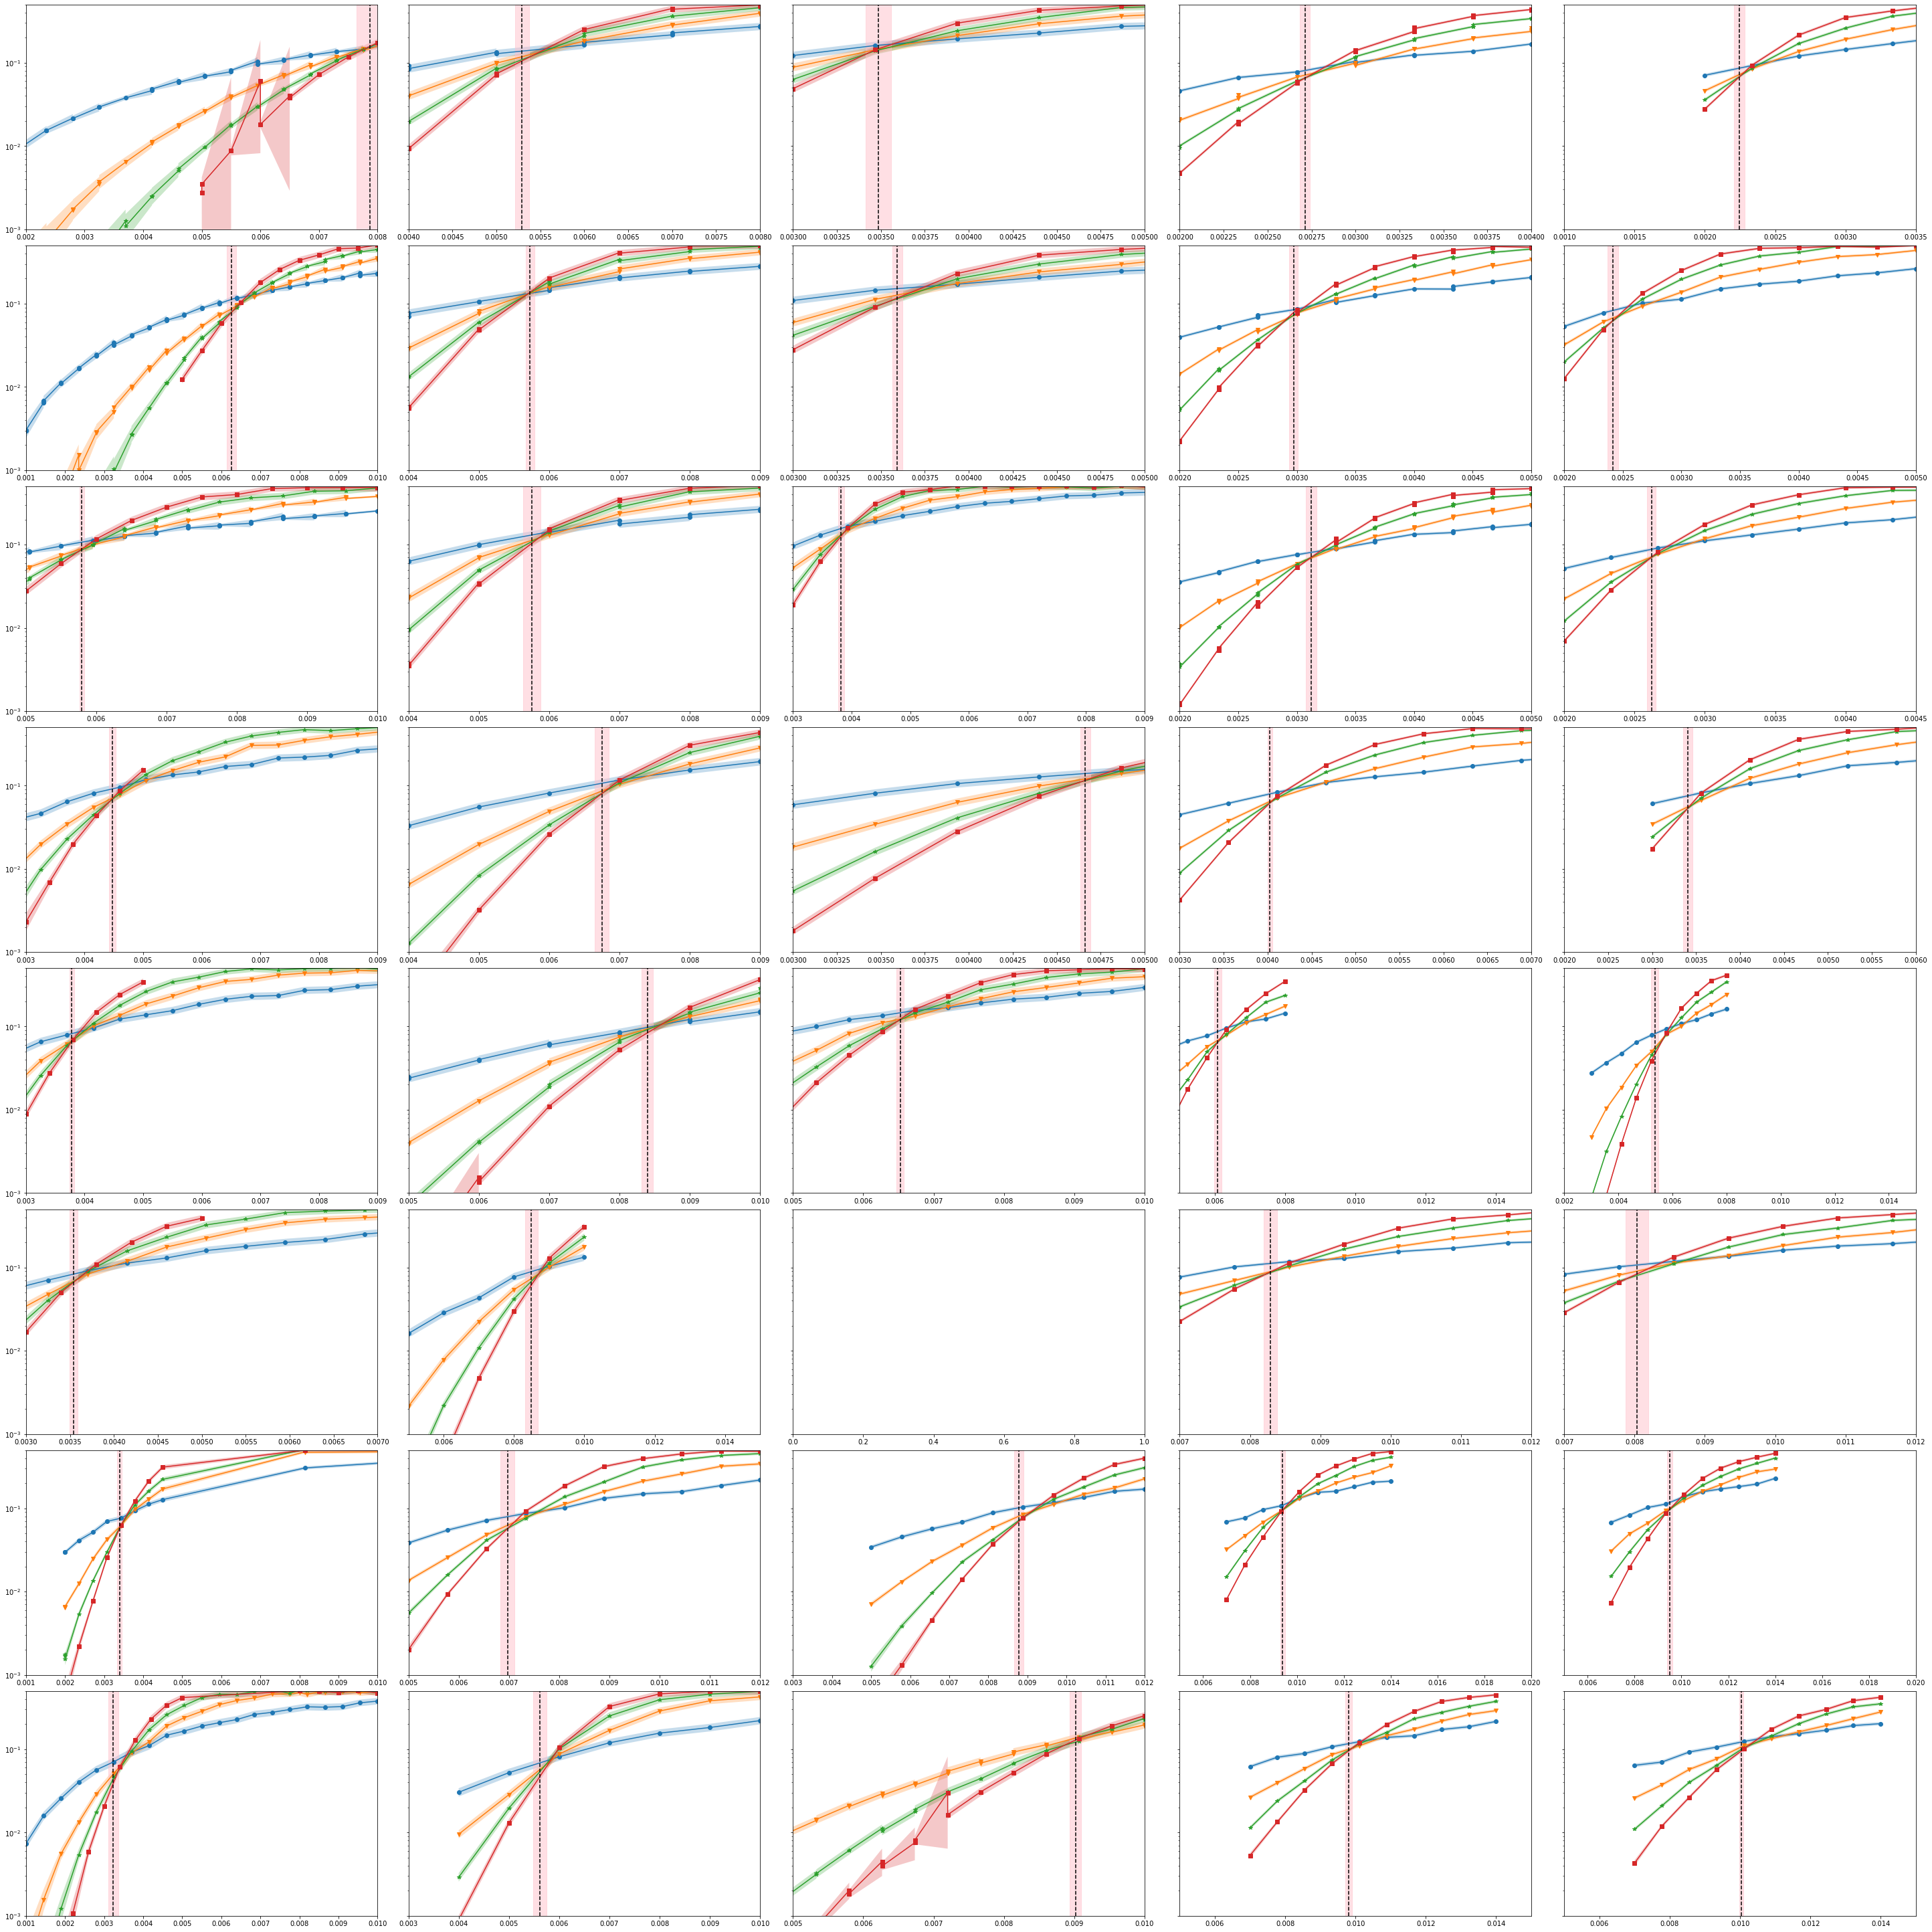

In [19]:
fig, axis = plt.subplots(8,5,figsize=(40,40), sharey=True, constrained_layout=True)
axis[0][0].set_ylim(0.001, 0.5)
thresholds_vs_gauge_factor_hcc_pm = dict()
gauge_factors = ['Gauge1', 'Gauge2', 'Gauge3', 'Gauge4', 'Gauge5']

x_bounds = dict()
x_bounds['Gauge1'] = {0: (0.002, 0.008), 0.25: (0.001, 0.01) , 0.5: (0.005, 0.01), 2: (0.003, 0.009), 8: (0.003, 0.009), 32: (0.003, 0.007), 128: (0.001, 0.01), 9999: (0.001, 0.01)}
x_bounds['Gauge2'] = {0: (0.004, 0.008), 0.25: (0.004, 0.009) , 0.5: (0.004, 0.009), 2: (0.004, 0.009), 8: (0.005, 0.01), 32: (0.005, 0.015), 128: (0.005, 0.012), 9999: (0.003, 0.01)}
x_bounds['Gauge3'] = {0: (0.003, 0.005), 0.25: (0.003, 0.005) , 0.5: (0.003, 0.009), 2: (0.003, 0.005), 8: (0.005, 0.01), 32: (0.007, 0.01), 128: (0.003, 0.012), 9999: (0.005, 0.01)}
x_bounds['Gauge4'] = {0: (0.002, 0.004), 0.25: (0.002, 0.005) , 0.5: (0.002, 0.005), 2: (0.003, 0.007), 8: (0.005, 0.015), 32: (0.007, 0.012), 128: (0.005, 0.02), 9999: (0.005, 0.015)}
x_bounds['Gauge5'] = {0: (0.001, 0.0035), 0.25: (0.002, 0.005) , 0.5: (0.002, 0.0045), 2: (0.002, 0.006), 8: (0.002, 0.015), 32: (0.007, 0.012), 128: (0.005, 0.02), 9999: (0.005, 0.015)}

for gauge_factor in gauge_factors:
    thresholds_vs_gauge_factor_hcc_pm[gauge_factor] = dict()
for gauge_index, gauge_factor in enumerate(gauge_factors):
    for bias_index, bias in enumerate(biases):
        if gauge_factor == 'Gauge1':
            filter_func = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
            thresholds_vs_gauge_factor_hcc_pm[gauge_factor][bias] = plot_threshold(axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)
        elif gauge_factor == 'Gauge3' and bias == 32:
            pass
        else:
            filter_func = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == gauge_factor + 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
            thresholds_vs_gauge_factor_hcc_pm[gauge_factor][bias] = plot_threshold(axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)



0 Gauge1
0.25 Gauge1
0.5 Gauge1
2 Gauge1
8 Gauge1
32 Gauge1
128 Gauge1
9999 Gauge1


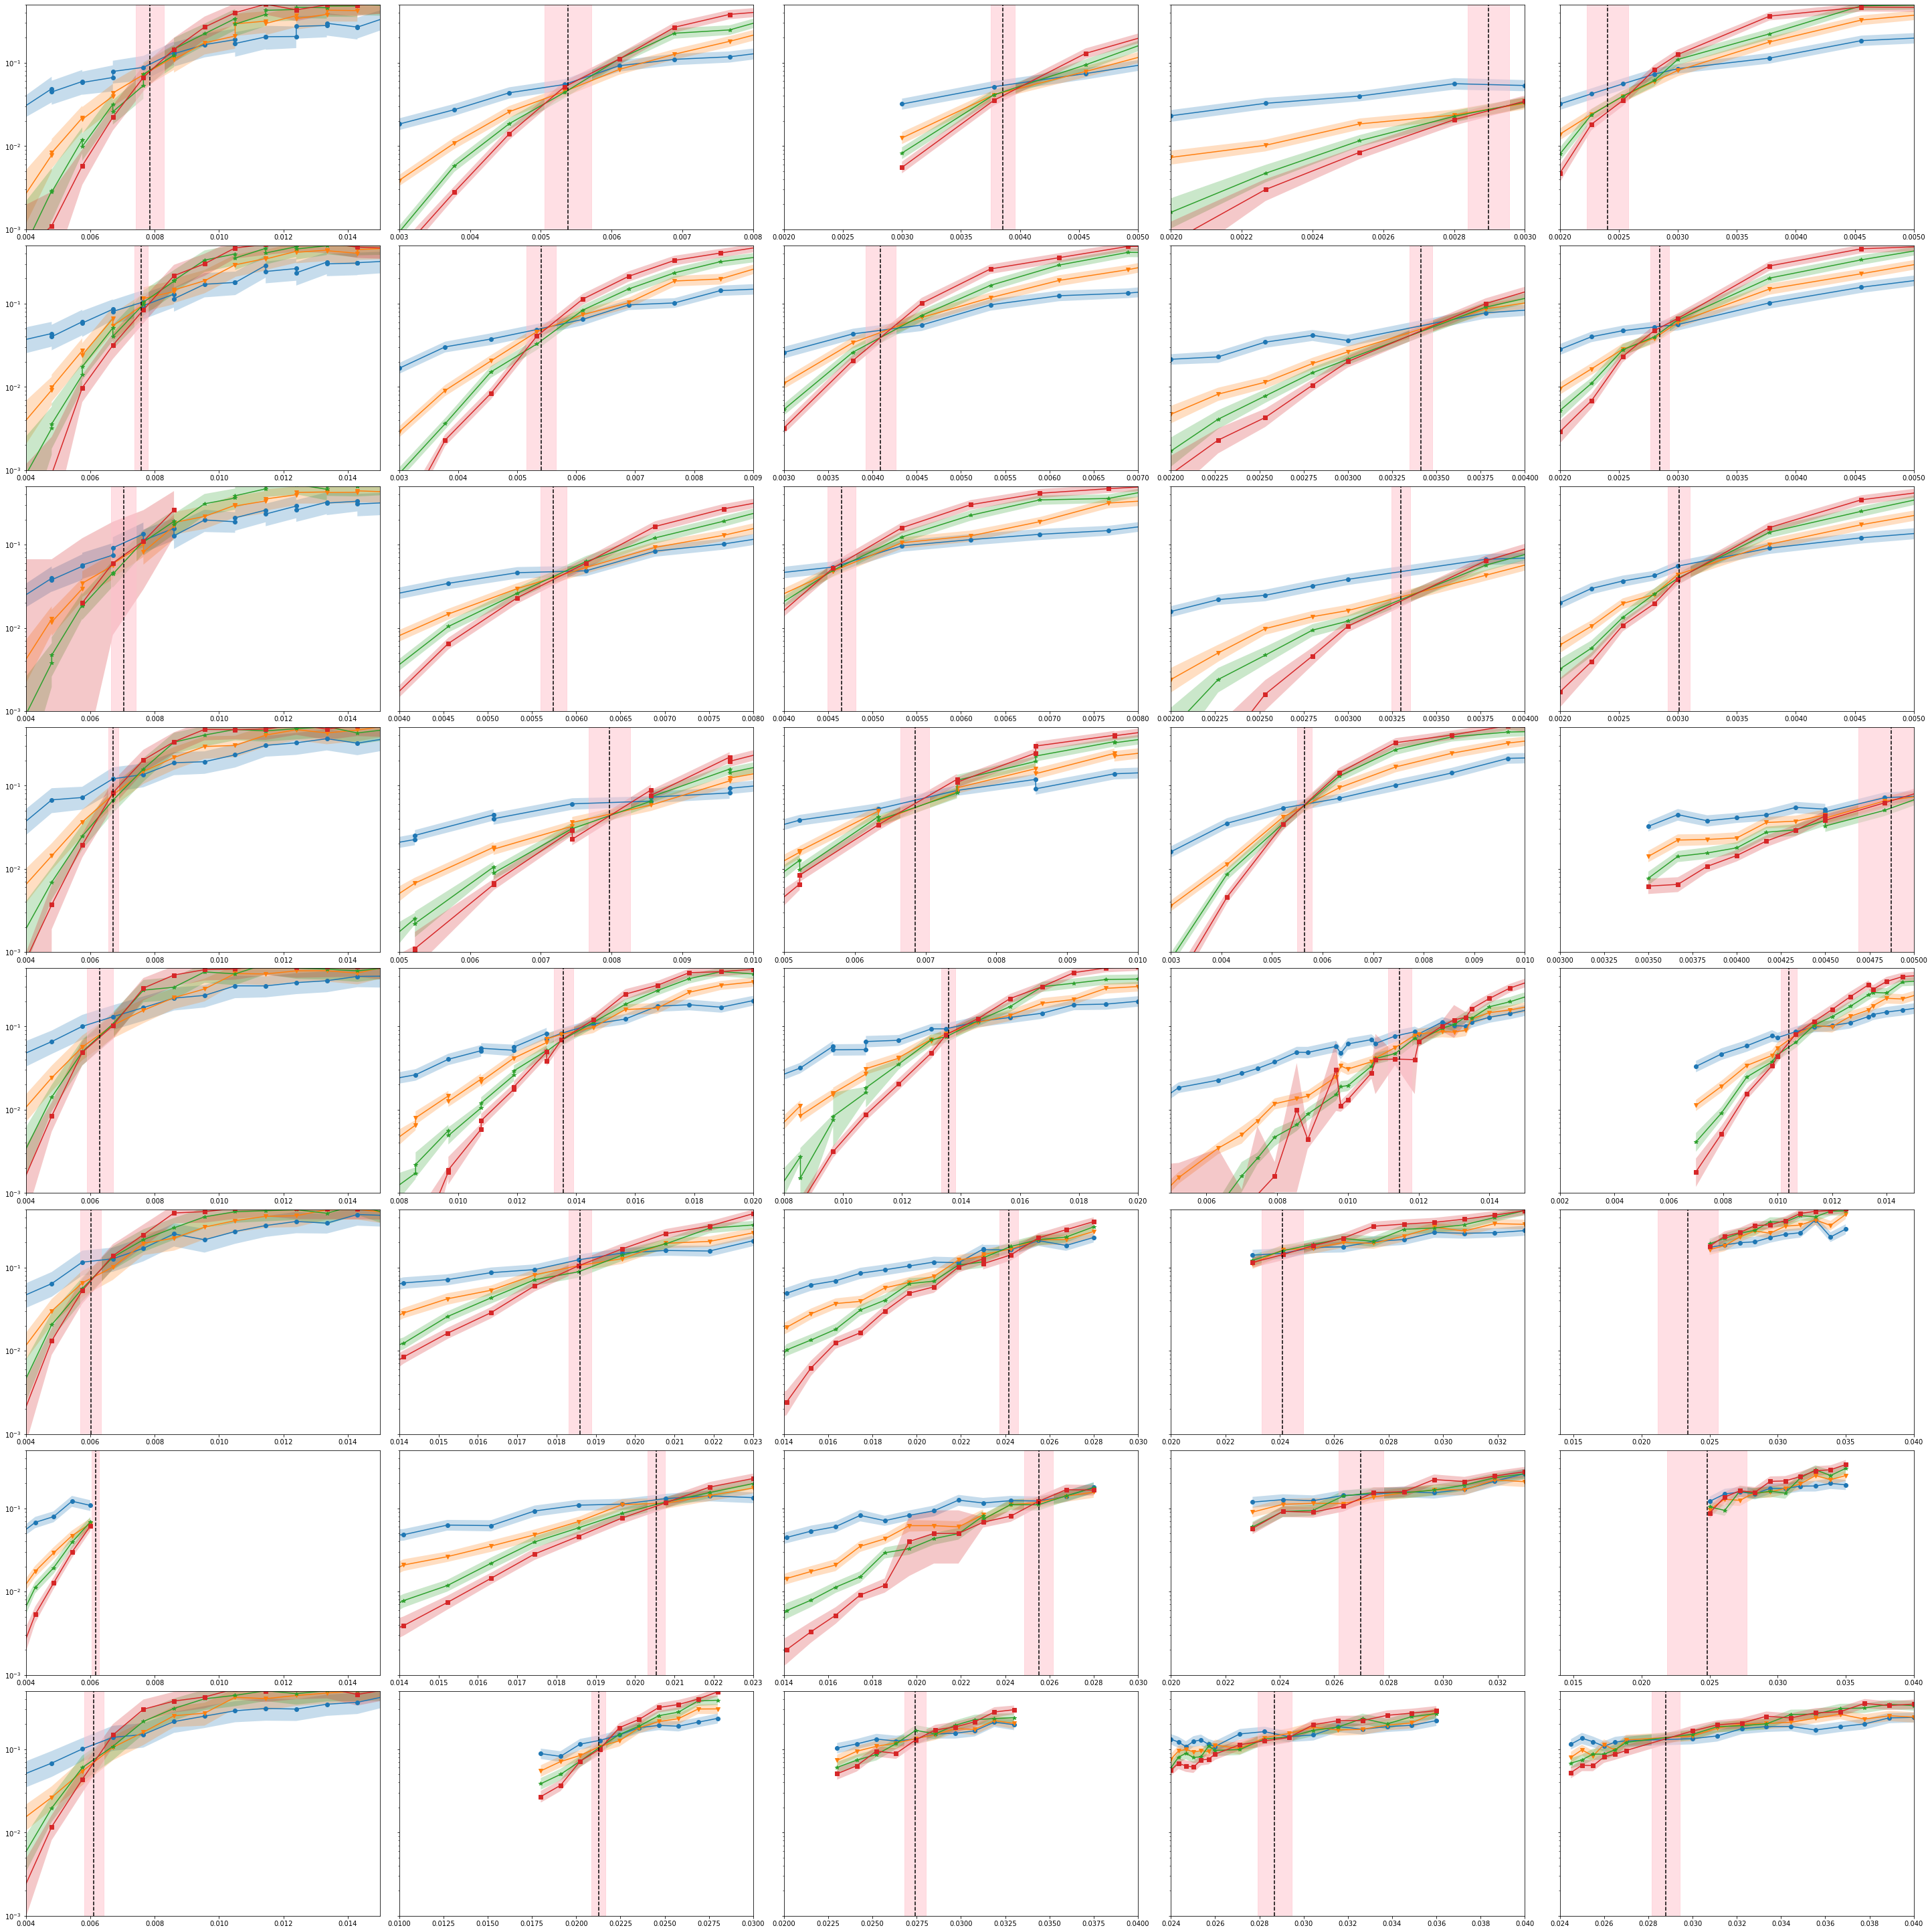

In [16]:
fig, axis = plt.subplots(8,5,figsize=(40,40), sharey=True, constrained_layout=True)
axis[0][0].set_ylim(0.001, 0.5)
thresholds_vs_gauge_factor_hcc_bm = dict()
gauge_factors = ['Gauge1', 'Gauge2', 'Gauge3','Gauge4','Gauge5']
for gauge_factor in gauge_factors:
    thresholds_vs_gauge_factor_hcc_bm[gauge_factor] = dict()

x_bounds = dict()
x_bounds['Gauge1'] = {0: (0.004, 0.015), 0.25: (0.004,0.015), 0.5: (0.004, 0.015), 2: (0.004, 0.015), 8: (0.004, 0.015), 32: (0.004, 0.015), 128: (0.004, 0.015), 9999: (0.004, 0.015)}
x_bounds['Gauge2'] = {0: (0.003, 0.008), 0.25: (0.003, 0.009) , 0.5: (0.004, 0.008), 2: (0.005, 0.01), 8: (0.008, 0.02), 32: (0.014, 0.023), 128: (0.014, 0.023), 9999: (0.01, 0.03)}
x_bounds['Gauge3'] = {0: (0.002, 0.005), 0.25: (0.003, 0.007) , 0.5: (0.004, 0.008), 2: (0.005, 0.01), 8: (0.008, 0.02), 32: (0.014, 0.03), 128: (0.014, 0.03), 9999: (0.02, 0.04)}
x_bounds['Gauge4'] = {0: (0.002, 0.003), 0.25: (0.002, 0.004) , 0.5: (0.002, 0.004), 2: (0.003, 0.01), 8: (0.005, 0.015), 32: (0.02, 0.033), 128: (0.02, 0.033), 9999: (0.024, 0.04)}
x_bounds['Gauge5'] = {0: (0.002, 0.005), 0.25: (0.002, 0.005) , 0.5: (0.002, 0.005), 2: (0.003, 0.005), 8: (0.002, 0.015), 32: (0.014, 0.04), 128: (0.014, 0.04), 9999: (0.024, 0.04)}

for gauge_index, gauge_factor in enumerate(gauge_factors):
    for bias_index, bias in enumerate(biases):
        if gauge_factor == 'Gauge1':
            filter_func = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
            thresholds_vs_gauge_factor_hcc_bm[gauge_factor][bias] = plot_threshold(axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)
        else:
            filter_func = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == gauge_factor + 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
            thresholds_vs_gauge_factor_hcc_bm[gauge_factor][bias] = plot_threshold(axis[bias_index][gauge_index], samples, filter_func, x_bounds[gauge_factor][bias][0], x_bounds[gauge_factor][bias][1], 5)



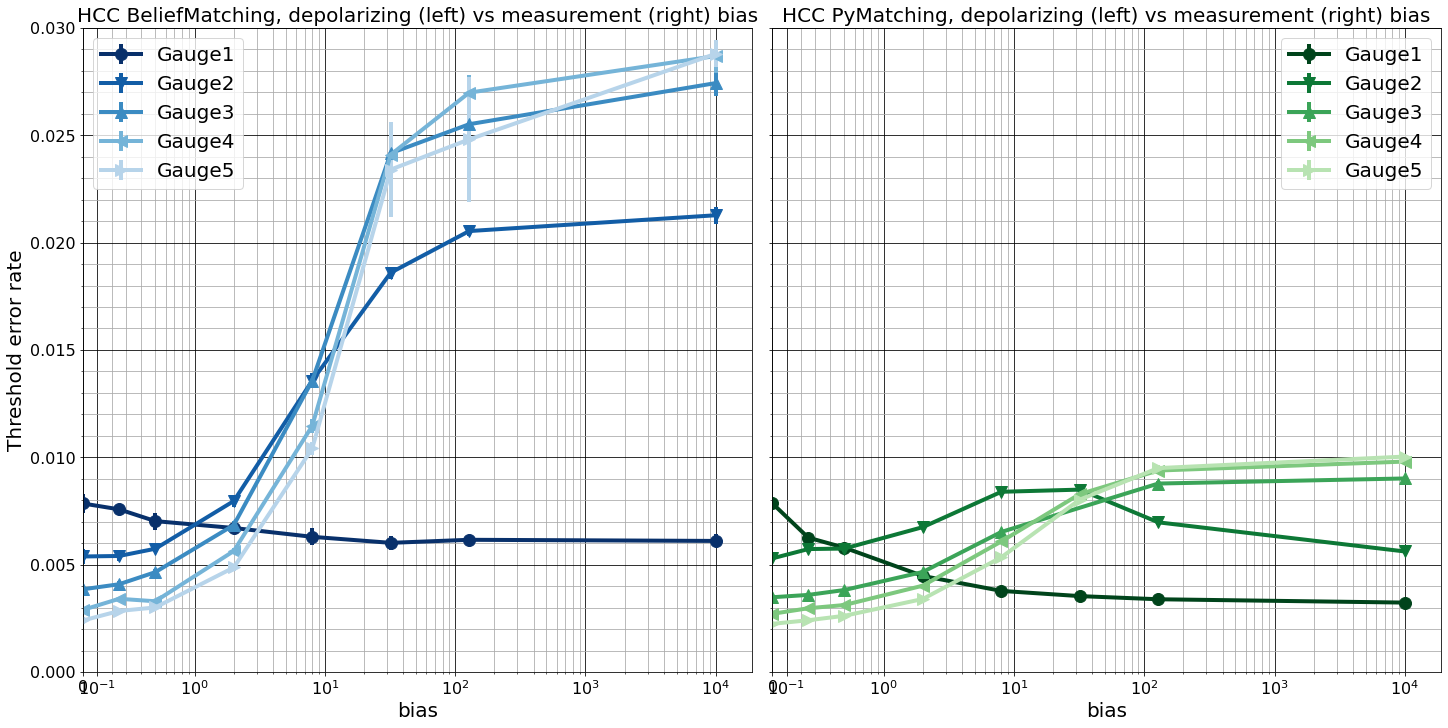

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,10), sharey=True, constrained_layout=True)
def plot_gauge_thresholds(thresholds, ax, line_style,label,color, marker):
    y_val = [thresholds[bias][0] for bias in biases if bias in thresholds.keys()]
    y_err = [thresholds[bias][1] for bias in biases if bias in thresholds.keys()]
    ax.errorbar([bias for bias in biases if bias in thresholds.keys()], y_val, yerr=y_err, label=label, marker=marker,markersize=12, linewidth=4, linestyle=line_style, color=color)
b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]
g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]
# get list of markers implemented in matplotlib
markers = [m for m in plt.Line2D.markers.keys() if m not in ['None', ' ', '']]

for index, gauge in enumerate(['Gauge1', 'Gauge2', 'Gauge3', 'Gauge4', 'Gauge5']):
    plot_gauge_thresholds(thresholds_vs_gauge_factor_hcc_bm[gauge], ax[0], 'solid', gauge, b_colors[index], markers[index+2])
    plot_gauge_thresholds(thresholds_vs_gauge_factor_hcc_pm[gauge], ax[1], 'solid', gauge, g_colors[index], markers[index+2])


for a in ax:
    a.set_xscale('symlog', linthresh = 0.5, subs = range(2, 10), linscale = 0.5)
    a.set_xlabel('bias', size=20)
    a.set_xlim(0,19000)
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)
    
ax[0].set_ylim(0,0.03)
ax[0].set_ylabel('Threshold error rate', size=20)
ax[0].set_title('HCC BeliefMatching, depolarizing (left) vs measurement (right) bias', size=20)
ax[1].set_title('HCC PyMatching, depolarizing (left) vs measurement (right) bias', size=20)
ax[0].legend(prop={'size': 20})
ax[1].legend(prop={'size': 20})


## Depolarizing vs dephasing noise

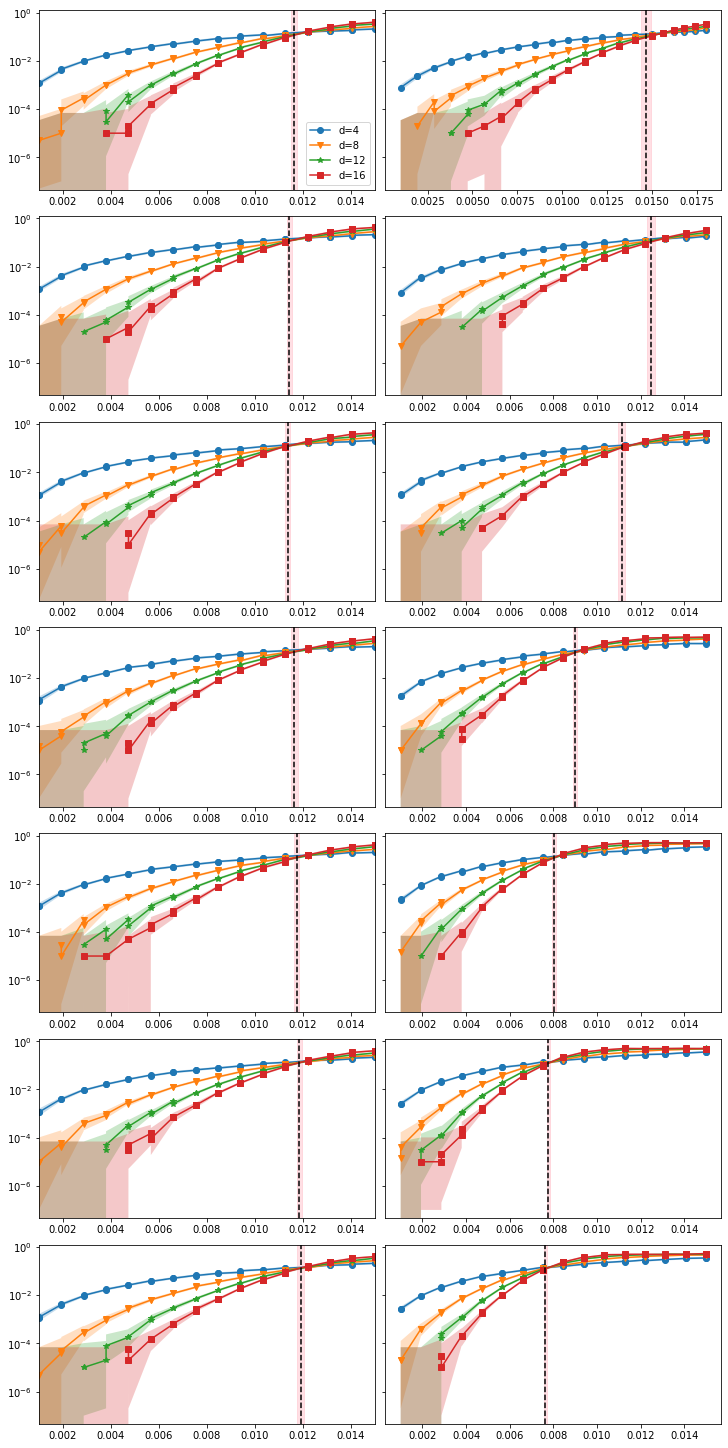

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()
for index,bias in enumerate(biases):
    filter_func_hcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    filter_func_fcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    
    thresholds_hcc[bias] = plot_threshold(axis[index][0], samples,filter_func_hcc,0.006, 0.015, 5)
    thresholds_fcc[bias] = plot_threshold(axis[index][1], samples, filter_func_fcc, 0.005, 0.018, 5)

    axis[index][0].set_xlim(0.001,0.015)
    axis[0][0].legend()
    
all_thresholds_hcc['pymatching']['depolarizing_vs_dephasing'] = thresholds_hcc
all_thresholds_fcc['pymatching']['depolarizing_vs_dephasing'] = thresholds_fcc

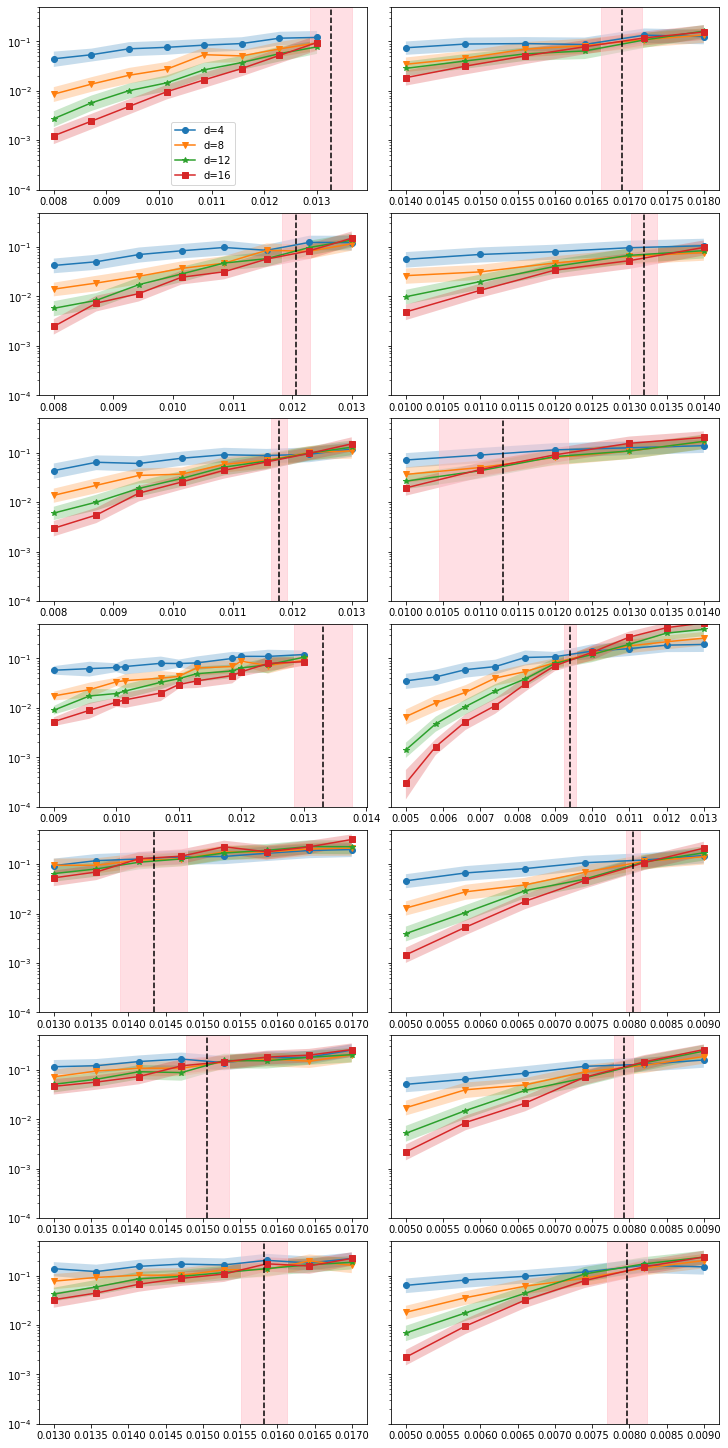

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()
for index,bias in enumerate(biases):
    filter_func_hcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    filter_func_fcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    thresholds_hcc[bias] = plot_threshold(axis[index][0], samples,filter_func_hcc,0.005, 0.02, 5)
    thresholds_fcc[bias]= plot_threshold(axis[index][1], samples, filter_func_fcc,0.005, 0.02, 5)
    axis[0][0].legend()
    axis[index][0].set_ylim(10**-4, 0.5)
    axis[index][1].set_ylim(10**-4, 0.5)
all_thresholds_hcc['beliefmatching']['depolarizing_vs_dephasing'] = thresholds_hcc
all_thresholds_fcc['beliefmatching']['depolarizing_vs_dephasing'] = thresholds_fcc

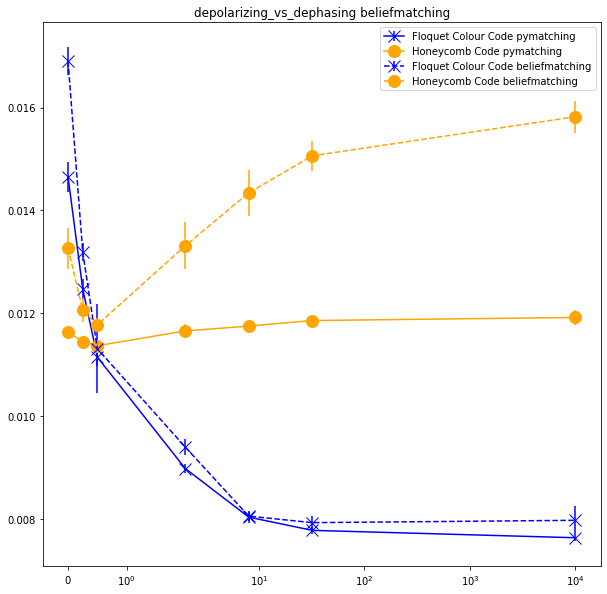

In [ ]:
def plot_bias_vs_threshold(ax, thresholds_fcc, thresholds_hcc, decoder, bias_type, linestyle):
    biases = [bias for bias in thresholds_hcc[decoder][bias_type]]
    biases.sort()
    ax.errorbar(biases, [thresholds_fcc[decoder][bias_type][bias][0] for bias in biases], yerr=[
        thresholds_fcc[decoder][bias_type][bias][1] for bias in biases], label='Floquet Colour Code ' + str(decoder), marker='x', color='blue', linestyle=linestyle, markersize=12)
    ax.errorbar(biases, [thresholds_hcc[decoder][bias_type][bias][0] for bias in biases], yerr=[
                     thresholds_hcc[decoder][bias_type][bias][1] for bias in biases], label='Honeycomb Code ' + str(decoder), marker='o', color='orange', linestyle=linestyle, markersize=12)
    ax.set_xscale('symlog')
    ax.set_title(bias_type + " " + decoder)
    ax.legend()


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'pymatching', 'depolarizing_vs_dephasing', 'solid')
plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'beliefmatching', 'depolarizing_vs_dephasing', 'dashed')
plt.savefig('depolarizing_vs_dephasing.png')


## Depolarizing vs Y noise

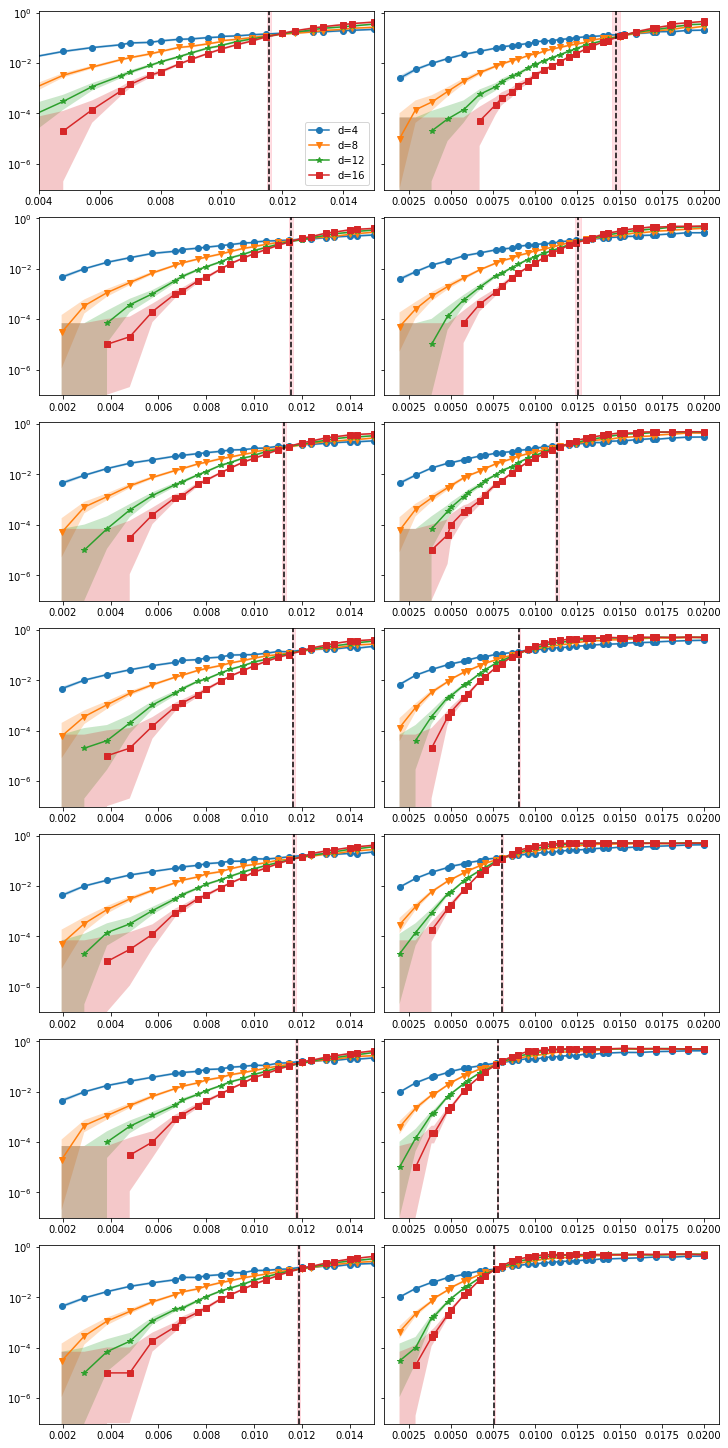

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()

for index,bias in enumerate(biases):


    filter_func_hcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'
    filter_func_fcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'

    if bias == 0: 
        thresholds_hcc[bias] = plot_threshold(axis[index][0], samples,filter_func_hcc,0.006, 0.015, 5)
        thresholds_fcc[bias] = plot_threshold(axis[index][1], samples, filter_func_fcc,0.005, 0.018, 5)
        axis[index][0].set_xlim(0.004,0.015)
    else:
        thresholds_hcc[bias] = plot_threshold(axis[index][0], samples, filter_func_hcc, 0.006, 0.015, 5)
        thresholds_fcc[bias] = plot_threshold(axis[index][1], samples, filter_func_fcc, 0.005, 0.015, 5)
        axis[index][0].set_xlim(0.001,0.015)
    axis[0][0].legend()

all_thresholds_hcc['pymatching']['depolarizing_vs_y'] = thresholds_hcc
all_thresholds_fcc['pymatching']['depolarizing_vs_y'] = thresholds_fcc

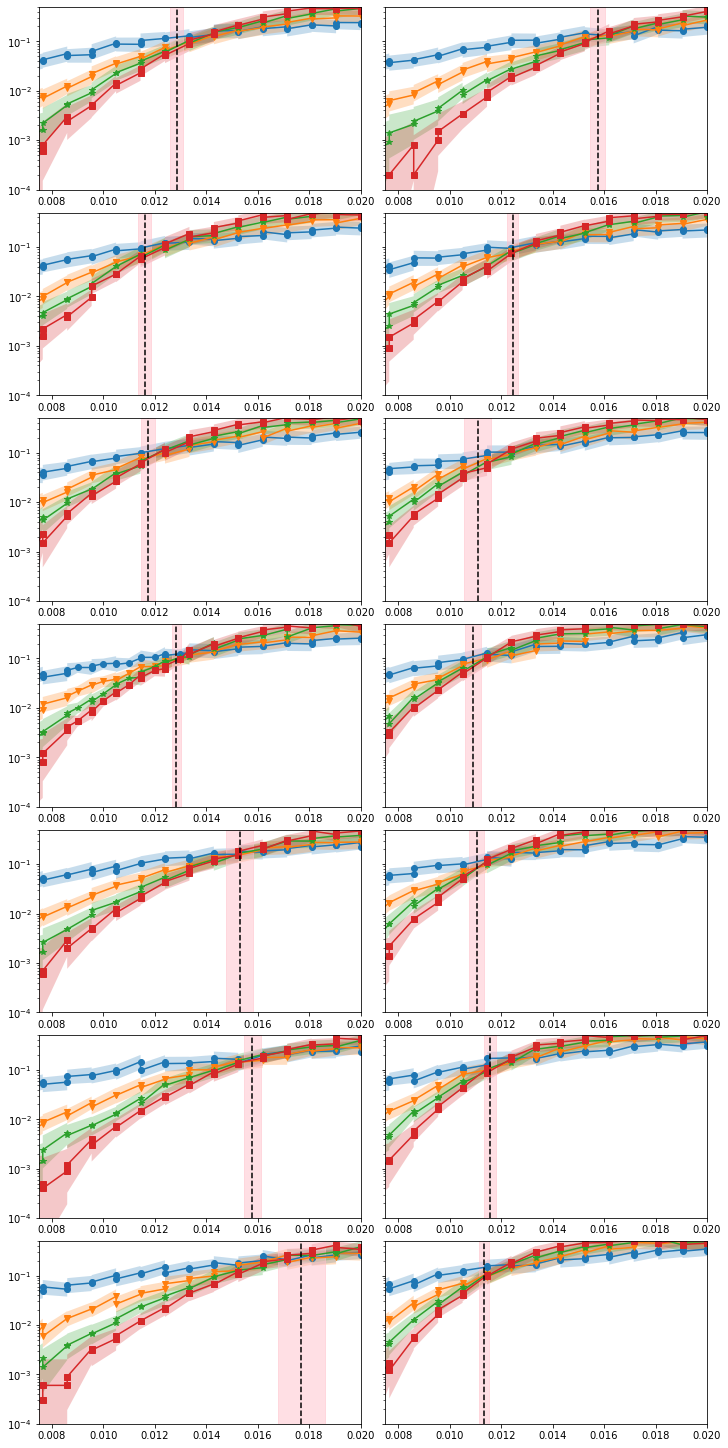

In [ ]:
fig, axis = plt.subplots(7, 2, figsize=(10, 20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()


def filter_func_hcc(s): return s.decoder == 'beliefmatching' and s.json_metadata[
    'code'] == 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'


def filter_func_fcc(s): return s.decoder == 'beliefmatching' and s.json_metadata[
    'code'] == 'FloquetColourCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'


for index, bias in enumerate(biases):


    thresholds_hcc[bias] = plot_threshold(axis[index][0], samples, filter_func_hcc, 0.0075, 0.017,5)
    thresholds_fcc[bias] =plot_threshold(axis[index][1], samples, filter_func_fcc, 0.0075, 0.017, 5)
    axis[index][0].set_xlim(0.0075, 0.02)
    axis[index][1].set_xlim(0.0075, 0.02)
    axis[index][0].set_ylim(10**-4, 0.5)
    axis[index][1].set_ylim(10**-4, 0.5)

all_thresholds_hcc['beliefmatching']['depolarizing_vs_y'] = thresholds_hcc
all_thresholds_fcc['beliefmatching']['depolarizing_vs_y'] = thresholds_fcc


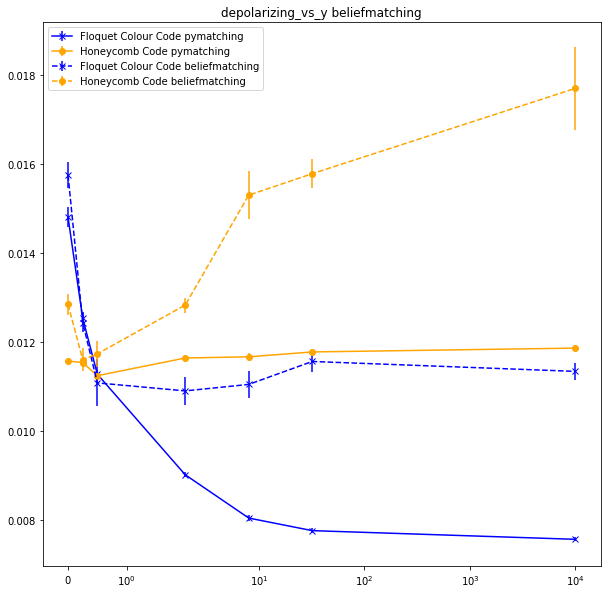

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'pymatching', 'depolarizing_vs_y', 'solid')
plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'beliefmatching', 'depolarizing_vs_y', 'dashed')
plt.savefig('depolarizing_vs_dephasing.png')

# Depolarizing vs measurement

KeyError: 'depolarizing_vs_dephasing'

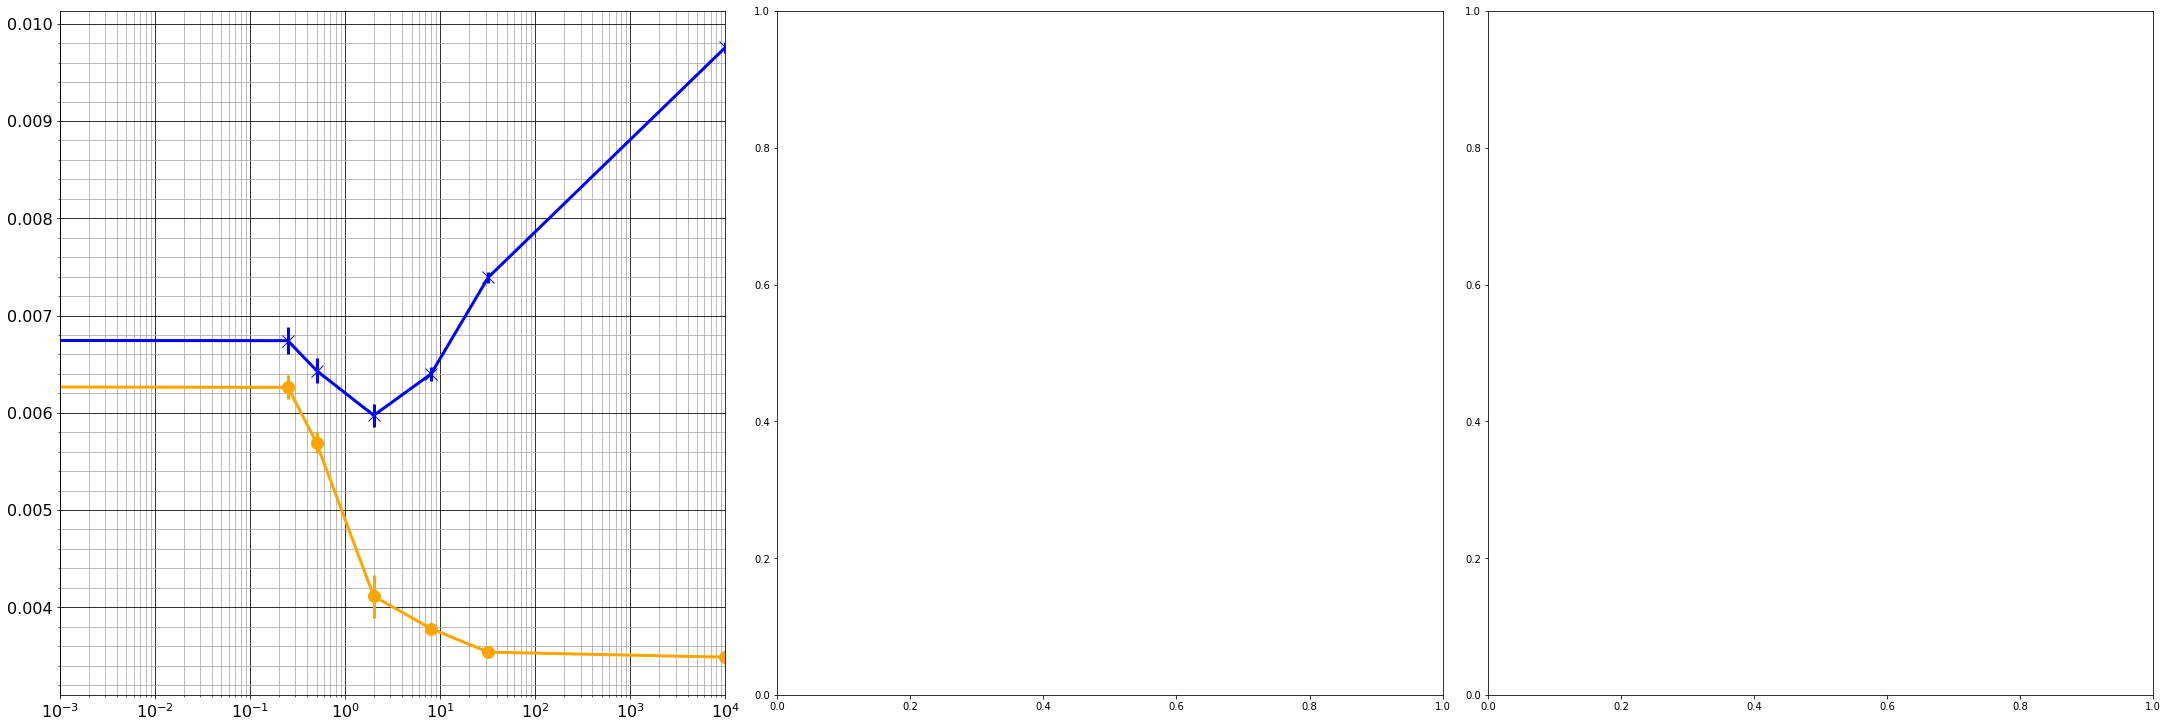

In [ ]:
def plot_bias_vs_threshold(ax, thresholds_fcc, thresholds_hcc, decoder, bias_type, linestyle):
    biases = [bias for bias in thresholds_hcc[decoder][bias_type]]
    biases.sort()
    ax.errorbar([bias for bias in biases], [thresholds_fcc[decoder][bias_type][bias][0] for bias in biases], yerr=[
        thresholds_fcc[decoder][bias_type][bias][1] for bias in biases], label='Floquet Colour Code ' + str(decoder), marker='x', color='blue', linestyle=linestyle, markersize=12, linewidth=3)
    ax.errorbar([bias for bias in biases], [thresholds_hcc[decoder][bias_type][bias][0] for bias in biases], yerr=[
        thresholds_hcc[decoder][bias_type][bias][1] for bias in biases], label='Honeycomb Code ' + str(decoder), marker='o', color='orange', linestyle=linestyle, markersize=12, linewidth=3)
    #ax.set_xscale('symlog', linthresh=0.5, subs=range(2, 10),linscale=0.8)
    ax.minorticks_on()
    # increase ticksize to 10
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xscale('log')
    ax.grid(which='minor', color='#AAAAAA')
    ax.grid(which='major', color='black')
    ax.set_xlim(10**-3, 10**4)
    # include 0 in the x axis

fig, axs = plt.subplots(1,3,figsize=(30,10), constrained_layout=True)

plot_bias_vs_threshold(axs[0], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_measurement','solid')
plot_bias_vs_threshold(axs[1], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_dephasing','solid')
plot_bias_vs_threshold(axs[2], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_y','solid')

plot_bias_vs_threshold(axs[0], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_measurement','dashed')
plot_bias_vs_threshold(axs[1], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_dephasing','dashed')
plot_bias_vs_threshold(axs[2], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_y','dashed')

axs[0].legend(prop={'size': 20}, handlelength=4)
axs[0].set_title('Depolarizing vs Measurement', fontsize=30)
axs[1].set_title('XY vs Z', fontsize=30)
axs[2].set_title('XZ vs Y', fontsize=30)
axs[0].set_ylabel('Threshold Error Rate', fontsize=20)
axs[0].set_xlabel('Bias', fontsize=20)
axs[1].set_xlabel('Bias', fontsize=20)
axs[2].set_xlabel('Bias', fontsize=20)


